# Problem F12-3: Slope of End A of a Cantilever Beam

## Problem Statement

Determine the slope of end A of the cantilevered beam. 
- E = 200 GPa 
- I = 65.0(10⁶) mm⁴
- 10 kN concentrated load at end A
- 3 kN/m distributed load along the entire beam
- Beam length = 3 m

In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
E = 200e9  # Young's modulus in Pa (200 GPa)
I = 65.0e6 * 1e-12  # Moment of inertia in m⁴ (converted from mm⁴)
L = 3.0  # Length of beam in m
P = 10e3  # Concentrated load at end A in N (10 kN)
w = 3e3  # Distributed load in N/m (3 kN/m)

# Print the given parameters
print(f"Young's modulus (E) = {E/1e9:.1f} GPa")
print(f"Moment of inertia (I) = {I*1e12:.1f}×10⁶ mm⁴")
print(f"Beam length (L) = {L:.1f} m")
print(f"Concentrated load at end A (P) = {P/1e3:.1f} kN")
print(f"Distributed load (w) = {w/1e3:.1f} kN/m")

Young's modulus (E) = 200.0 GPa
Moment of inertia (I) = 65000000.0×10⁶ mm⁴
Beam length (L) = 3.0 m
Concentrated load at end A (P) = 10.0 kN
Distributed load (w) = 3.0 kN/m


## Step 1: Determine the Bending Moment Equation

For a cantilever beam with a concentrated load P at the free end and a uniformly distributed load w along the entire beam, the bending moment at a distance x from the free end is:

$$M(x) = P \cdot x + \frac{w \cdot x^2}{2}$$

Where:
- x is measured from the free end (end A)
- P is the concentrated load at the free end
- w is the distributed load

DEBUG - Moment at x=0.00m: -0.00 N·m
DEBUG - Moment at x=0.03m: -304.41 N·m
DEBUG - Moment at x=0.06m: -611.57 N·m
DEBUG - Moment at x=0.09m: -921.49 N·m
DEBUG - Moment at x=0.12m: -1234.16 N·m
DEBUG - Moment at x=0.15m: -1549.59 N·m
DEBUG - Moment at x=0.18m: -1867.77 N·m
DEBUG - Moment at x=0.21m: -2188.71 N·m
DEBUG - Moment at x=0.24m: -2512.40 N·m
DEBUG - Moment at x=0.27m: -2838.84 N·m
DEBUG - Moment at x=0.30m: -3168.04 N·m
DEBUG - Moment at x=0.33m: -3500.00 N·m
DEBUG - Moment at x=0.36m: -3834.71 N·m
DEBUG - Moment at x=0.39m: -4172.18 N·m
DEBUG - Moment at x=0.42m: -4512.40 N·m
DEBUG - Moment at x=0.45m: -4855.37 N·m
DEBUG - Moment at x=0.48m: -5201.10 N·m
DEBUG - Moment at x=0.52m: -5549.59 N·m
DEBUG - Moment at x=0.55m: -5900.83 N·m
DEBUG - Moment at x=0.58m: -6254.82 N·m
DEBUG - Moment at x=0.61m: -6611.57 N·m
DEBUG - Moment at x=0.64m: -6971.07 N·m
DEBUG - Moment at x=0.67m: -7333.33 N·m
DEBUG - Moment at x=0.70m: -7698.35 N·m
DEBUG - Moment at x=0.73m: -8066.12 N·m
DEBUG 

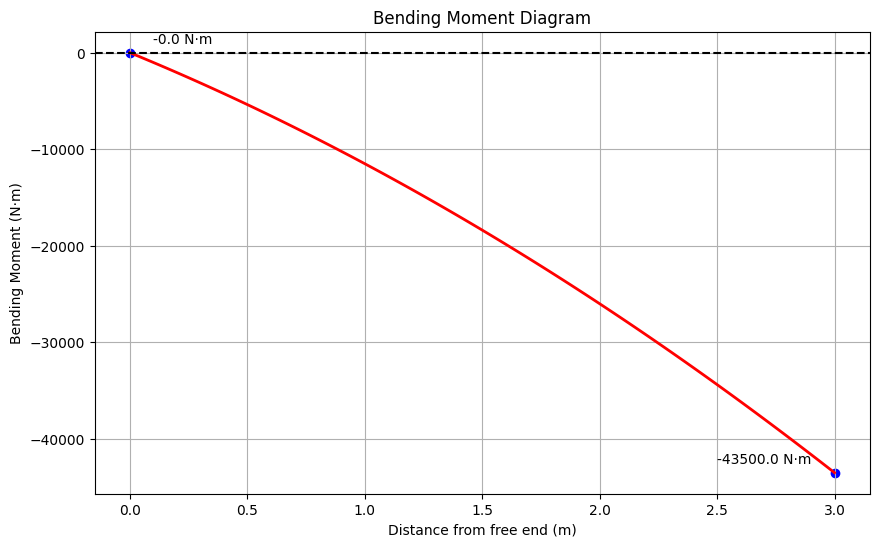

DEBUG - Moment at x=3.00m: -43500.00 N·m
Maximum bending moment (at fixed end) = -43.50 kN·m

DEBUG - Shear force calculations:
DEBUG - Shear at x=0.00m: -10000.00 N
Shear at free end (x=0): -10000.00 N
DEBUG - Shear at x=0.75m: -12250.00 N
Shear at x=L/4 (0.75m): -12250.00 N
DEBUG - Shear at x=1.50m: -14500.00 N
Shear at x=L/2 (1.50m): -14500.00 N
DEBUG - Shear at x=2.25m: -16750.00 N
Shear at x=3L/4 (2.25m): -16750.00 N
DEBUG - Shear at x=3.00m: -19000.00 N
Shear at fixed end (x=L=3.00m): -19000.00 N


In [27]:
# Define the bending moment function
def moment(x):
    moment_value = -P * x - (w * x**2) / 2
    print(f"DEBUG - Moment at x={x:.2f}m: {moment_value:.2f} N·m")
    return moment_value

# Create a range of x values for plotting
x_values = np.linspace(0, L, 100)
moment_values = [moment(x) for x in x_values]

# Print moments at specific points for debugging
print("\nDEBUG - Moment calculations:")
print(f"Moment at free end (x=0): {moment(0):.2f} N·m")
print(f"Moment at x=L/4 ({L/4:.2f}m): {moment(L/4):.2f} N·m")
print(f"Moment at x=L/2 ({L/2:.2f}m): {moment(L/2):.2f} N·m")
print(f"Moment at x=3L/4 ({3*L/4:.2f}m): {moment(3*L/4):.2f} N·m")
print(f"Moment at fixed end (x=L={L:.2f}m): {moment(L):.2f} N·m")

# Plot the bending moment diagram
plt.figure(figsize=(10, 6))
plt.plot(x_values, moment_values, 'r-', linewidth=2)
plt.grid(True)
plt.title('Bending Moment Diagram')
plt.xlabel('Distance from free end (m)')
plt.ylabel('Bending Moment (N·m)')
plt.axhline(y=0, color='k', linestyle='--')

# Add values at key points
plt.scatter([0, L], [moment(0), moment(L)], color='blue')
plt.annotate(f'{moment(0):.1f} N·m', xy=(0, moment(0)), xytext=(0.1, moment(0)+1000))
plt.annotate(f'{moment(L):.1f} N·m', xy=(L, moment(L)), xytext=(L-0.5, moment(L)+1000))

plt.show()

# Print the maximum moment (at the fixed end)
max_moment = moment(L)
print(f"Maximum bending moment (at fixed end) = {max_moment/1e3:.2f} kN·m")

# Define the shear force function
def shear(x):
    shear_value = -P - w * x
    print(f"DEBUG - Shear at x={x:.2f}m: {shear_value:.2f} N")
    return shear_value

# Print shear forces at specific points for debugging
print("\nDEBUG - Shear force calculations:")
print(f"Shear at free end (x=0): {shear(0):.2f} N")
print(f"Shear at x=L/4 ({L/4:.2f}m): {shear(L/4):.2f} N")
print(f"Shear at x=L/2 ({L/2:.2f}m): {shear(L/2):.2f} N")
print(f"Shear at x=3L/4 ({3*L/4:.2f}m): {shear(3*L/4):.2f} N")
print(f"Shear at fixed end (x=L={L:.2f}m): {shear(L):.2f} N")

## Step 2: Determine the Slope Equation

The relationship between bending moment and beam deflection is given by:

$$EI \frac{d^2v}{dx^2} = M(x)$$

Where:
- E is Young's modulus
- I is the moment of inertia
- v is the deflection
- M(x) is the bending moment function

To find the slope, we need to integrate this equation once:

$$EI \frac{dv}{dx} = \int M(x) dx = \int \left( P \cdot x + \frac{w \cdot x^2}{2} \right) dx = \frac{P \cdot x^2}{2} + \frac{w \cdot x^3}{6} + C_1$$

For a cantilever beam, the boundary conditions are:
- At the fixed end (x = L), the slope is zero: $\frac{dv}{dx}|_{x=L} = 0$

Using this condition, we can solve for the constant of integration $C_1$.

In [28]:
# Determine the slope equation by integrating the moment equation
def slope_times_EI(x, C1):
    slope_EI = (P * x**2) / 2 + (w * x**3) / 6 + C1
    print(f"DEBUG - Slope*EI at x={x:.2f}m: {slope_EI:.2f} N·m²")
    return slope_EI

# Apply the boundary condition: slope = 0 at x = L (fixed end)
# Solve for C1
print("\nDEBUG - Calculating integration constant C1:")
print(f"P*L²/2 = {(P * L**2) / 2:.2f} N·m²")
print(f"w*L³/6 = {(w * L**3) / 6:.2f} N·m²")

C1 = -(P * L**2) / 2 - (w * L**3) / 6
print(f"Integration constant C1 = {C1:.2f} N·m²")

# Define the slope function with the determined constant
def slope(x):
    slope_val = slope_times_EI(x, C1) / (E * I)
    print(f"DEBUG - Slope at x={x:.2f}m: {slope_val:.6f} radians")
    return slope_val

# Calculate the slope at various points for debugging
print("\nDEBUG - Slope calculations:")
slope_at_fixed = slope(L)
print(f"Slope at fixed end (x=L={L:.2f}m): {slope_at_fixed:.6f} radians (should be close to 0)")

# Calculate the slope at the free end (x = 0)
slope_at_A = slope(0)
slope_at_A_degrees = np.degrees(slope_at_A)

print(f"Slope at end A = {slope_at_A:.6f} radians")
print(f"Slope at end A = {slope_at_A_degrees:.4f} degrees")

# Calculate slope at intermediate points
print(f"Slope at x=L/4 ({L/4:.2f}m): {slope(L/4):.6f} radians")
print(f"Slope at x=L/2 ({L/2:.2f}m): {slope(L/2):.6f} radians")
print(f"Slope at x=3L/4 ({3*L/4:.2f}m): {slope(3*L/4):.6f} radians")


DEBUG - Calculating integration constant C1:
P*L²/2 = 45000.00 N·m²
w*L³/6 = 13500.00 N·m²
Integration constant C1 = -58500.00 N·m²

DEBUG - Slope calculations:
DEBUG - Slope*EI at x=3.00m: 0.00 N·m²
DEBUG - Slope at x=3.00m: 0.000000 radians
Slope at fixed end (x=L=3.00m): 0.000000 radians (should be close to 0)
DEBUG - Slope*EI at x=0.00m: -58500.00 N·m²
DEBUG - Slope at x=0.00m: -0.004500 radians
Slope at end A = -0.004500 radians
Slope at end A = -0.2578 degrees
DEBUG - Slope*EI at x=0.75m: -55476.56 N·m²
DEBUG - Slope at x=0.75m: -0.004267 radians
Slope at x=L/4 (0.75m): -0.004267 radians
DEBUG - Slope*EI at x=1.50m: -45562.50 N·m²
DEBUG - Slope at x=1.50m: -0.003505 radians
Slope at x=L/2 (1.50m): -0.003505 radians
DEBUG - Slope*EI at x=2.25m: -27492.19 N·m²
DEBUG - Slope at x=2.25m: -0.002115 radians
Slope at x=3L/4 (2.25m): -0.002115 radians


## Step 3: Calculate the Deflection

To find the deflection, we integrate the slope equation:

$$EI \cdot v = \int EI \frac{dv}{dx} dx = \int \left( \frac{P \cdot x^2}{2} + \frac{w \cdot x^3}{6} + C_1 \right) dx = \frac{P \cdot x^3}{6} + \frac{w \cdot x^4}{24} + C_1 \cdot x + C_2$$

For a cantilever beam, the additional boundary condition is:
- At the fixed end (x = L), the deflection is zero: $v|_{x=L} = 0$

Using this condition, we can solve for the constant of integration $C_2$.

In [29]:
# Determine the deflection equation by integrating the slope equation
def deflection_times_EI(x, C1, C2):
    deflection_EI = (P * x**3) / 6 + (w * x**4) / 24 + C1 * x + C2
    print(f"DEBUG - Deflection*EI at x={x:.2f}m: {deflection_EI:.2f} N·m³")
    return deflection_EI

# Apply the boundary condition: deflection = 0 at x = L (fixed end)
# Solve for C2
print("\nDEBUG - Calculating integration constant C2:")
print(f"P*L³/6 = {(P * L**3) / 6:.2f} N·m³")
print(f"w*L⁴/24 = {(w * L**4) / 24:.2f} N·m³")
print(f"C1*L = {C1 * L:.2f} N·m³")

C2 = -(P * L**3) / 6 - (w * L**4) / 24 - C1 * L
print(f"Integration constant C2 = {C2:.2f} N·m³")

# Define the deflection function with the determined constants
def deflection(x):
    deflection_val = deflection_times_EI(x, C1, C2) / (E * I)
    print(f"DEBUG - Deflection at x={x:.2f}m: {deflection_val*1000:.4f} mm")
    return deflection_val

# Check deflection at fixed end (should be zero)
print("\nDEBUG - Deflection calculations:")
deflection_at_fixed = deflection(L)
print(f"Deflection at fixed end (x=L={L:.2f}m): {deflection_at_fixed*1000:.4f} mm (should be close to 0)")

# Calculate deflection at intermediate points
print(f"Deflection at x=L/4 ({L/4:.2f}m): {deflection(L/4)*1000:.4f} mm")
print(f"Deflection at x=L/2 ({L/2:.2f}m): {deflection(L/2)*1000:.4f} mm")
print(f"Deflection at x=3L/4 ({3*L/4:.2f}m): {deflection(3*L/4)*1000:.4f} mm")

# Calculate the deflection at the free end (x = 0)
deflection_at_A = deflection(0)
print(f"Deflection at end A = {deflection_at_A*1000:.4f} mm")

# Calculate the maximum deflection (at the free end)
max_deflection = deflection(0)
print(f"Maximum deflection (at free end) = {max_deflection*1000:.4f} mm")


DEBUG - Calculating integration constant C2:
P*L³/6 = 45000.00 N·m³
w*L⁴/24 = 10125.00 N·m³
C1*L = -175500.00 N·m³
Integration constant C2 = 120375.00 N·m³

DEBUG - Deflection calculations:
DEBUG - Deflection*EI at x=3.00m: 0.00 N·m³
DEBUG - Deflection at x=3.00m: 0.0000 mm
Deflection at fixed end (x=L=3.00m): 0.0000 mm (should be close to 0)
DEBUG - Deflection*EI at x=0.75m: 77242.68 N·m³
DEBUG - Deflection at x=0.75m: 5.9417 mm
Deflection at x=L/4 (0.75m): 5.9417 mm
DEBUG - Deflection*EI at x=1.50m: 38882.81 N·m³
DEBUG - Deflection at x=1.50m: 2.9910 mm
Deflection at x=L/2 (1.50m): 2.9910 mm
DEBUG - Deflection*EI at x=2.25m: 10937.99 N·m³
DEBUG - Deflection at x=2.25m: 0.8414 mm
Deflection at x=3L/4 (2.25m): 0.8414 mm
DEBUG - Deflection*EI at x=0.00m: 120375.00 N·m³
DEBUG - Deflection at x=0.00m: 9.2596 mm
Deflection at end A = 9.2596 mm
DEBUG - Deflection*EI at x=0.00m: 120375.00 N·m³
DEBUG - Deflection at x=0.00m: 9.2596 mm
Maximum deflection (at free end) = 9.2596 mm


## Step 4: Plot the Beam Deflection

DEBUG - Deflection*EI at x=0.00m: 120375.00 N·m³
DEBUG - Deflection at x=0.00m: 9.2596 mm
DEBUG - Deflection*EI at x=0.03m: 118602.32 N·m³
DEBUG - Deflection at x=0.03m: 9.1233 mm
DEBUG - Deflection*EI at x=0.06m: 116829.92 N·m³
DEBUG - Deflection at x=0.06m: 8.9869 mm
DEBUG - Deflection*EI at x=0.09m: 115058.08 N·m³
DEBUG - Deflection at x=0.09m: 8.8506 mm
DEBUG - Deflection*EI at x=0.12m: 113287.09 N·m³
DEBUG - Deflection at x=0.12m: 8.7144 mm
DEBUG - Deflection*EI at x=0.15m: 111517.23 N·m³
DEBUG - Deflection at x=0.15m: 8.5782 mm
DEBUG - Deflection*EI at x=0.18m: 109748.79 N·m³
DEBUG - Deflection at x=0.18m: 8.4422 mm
DEBUG - Deflection*EI at x=0.21m: 107982.07 N·m³
DEBUG - Deflection at x=0.21m: 8.3063 mm
DEBUG - Deflection*EI at x=0.24m: 106217.36 N·m³
DEBUG - Deflection at x=0.24m: 8.1706 mm
DEBUG - Deflection*EI at x=0.27m: 104454.96 N·m³
DEBUG - Deflection at x=0.27m: 8.0350 mm
DEBUG - Deflection*EI at x=0.30m: 102695.16 N·m³
DEBUG - Deflection at x=0.30m: 7.8996 mm
DEBUG - De

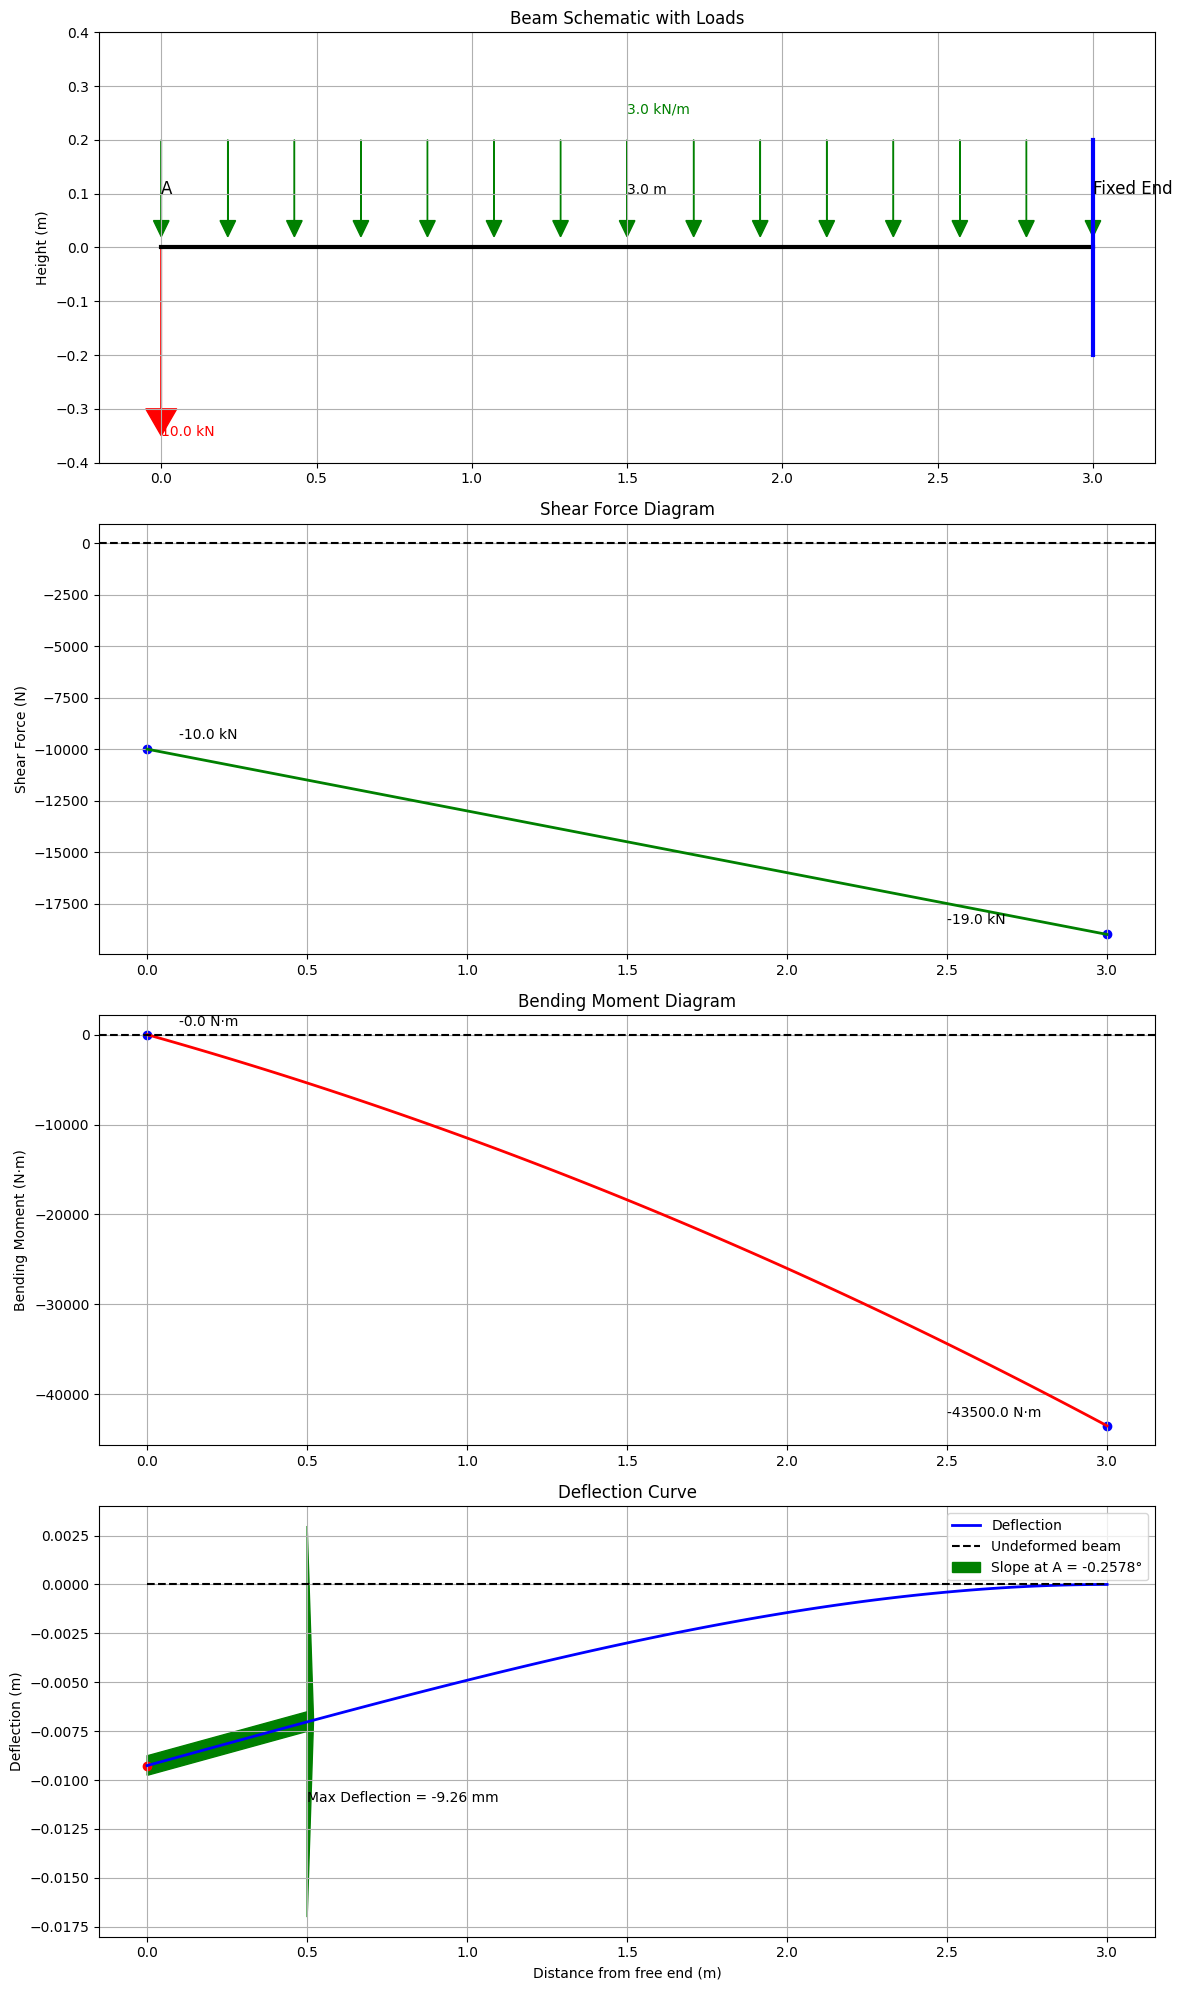

In [30]:
# Create a range of x values for plotting
x_values = np.linspace(0, L, 100)
deflection_values = [deflection(x) for x in x_values]
slope_values = [slope(x) for x in x_values]
shear_values = [shear(x) for x in x_values]

# Print min and max values for debugging
print("\nDEBUG - Plotting data summary:")
print(f"Minimum deflection: {min(deflection_values)*1000:.4f} mm at x≈{x_values[np.argmin(deflection_values)]:.2f}m")
print(f"Maximum deflection: {max(deflection_values)*1000:.4f} mm at x≈{x_values[np.argmax(deflection_values)]:.2f}m")
print(f"Deflection at free end (x=0): {deflection(0)*1000:.4f} mm")
print(f"Deflection at fixed end (x=L={L:.2f}m): {deflection(L)*1000:.4f} mm (should be close to 0)")

# Create a figure with four subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 20))

# Plot the beam schematic
ax1.plot([0, L], [0, 0], 'k-', linewidth=3, label='Beam')
ax1.plot([L, L], [-0.2, 0.2], 'b-', linewidth=3)  # Fixed end
ax1.arrow(0, 0, 0, -0.3, head_width=0.1, head_length=0.05, fc='r', ec='r')  # Concentrated load
ax1.text(0, 0.1, 'A', fontsize=12)
ax1.text(L, 0.1, 'Fixed End', fontsize=12)
ax1.text(L/2, 0.1, f'{L} m', fontsize=10)

# Add distributed load arrows
arrow_positions = np.linspace(0, L, 15)
for pos in arrow_positions:
    ax1.arrow(pos, 0.2, 0, -0.15, head_width=0.05, head_length=0.03, fc='g', ec='g')
    
ax1.text(L/2, 0.25, f'{w/1e3} kN/m', fontsize=10, color='g')
ax1.text(0, -0.35, f'{P/1e3} kN', fontsize=10, color='r')

ax1.set_ylabel('Height (m)')
ax1.grid(True)
ax1.set_xlim(-0.2, L+0.2)
ax1.set_ylim(-0.4, 0.4)
ax1.set_title('Beam Schematic with Loads')

# Plot the shear force diagram
ax2.plot(x_values, shear_values, 'g-', linewidth=2)
ax2.grid(True)
ax2.set_title('Shear Force Diagram')
ax2.set_ylabel('Shear Force (N)')
ax2.axhline(y=0, color='k', linestyle='--')

# Add values at key points
ax2.scatter([0, L], [shear(0), shear(L)], color='blue')
ax2.annotate(f'{shear(0)/1e3:.1f} kN', xy=(0, shear(0)), xytext=(0.1, shear(0)+500))
ax2.annotate(f'{shear(L)/1e3:.1f} kN', xy=(L, shear(L)), xytext=(L-0.5, shear(L)+500))

# Plot the bending moment diagram
moment_values = [moment(x) for x in x_values]
ax3.plot(x_values, moment_values, 'r-', linewidth=2)
ax3.grid(True)
ax3.set_title('Bending Moment Diagram')
ax3.set_ylabel('Bending Moment (N·m)')
ax3.axhline(y=0, color='k', linestyle='--')

# Add values at key points
ax3.scatter([0, L], [moment(0), moment(L)], color='blue')
ax3.annotate(f'{moment(0):.1f} N·m', xy=(0, moment(0)), xytext=(0.1, moment(0)+1000))
ax3.annotate(f'{moment(L):.1f} N·m', xy=(L, moment(L)), xytext=(L-0.5, moment(L)+1000))

# Plot the deflection curve
# Multiply deflection values by -1 to show downward deflection as negative
ax4.plot(x_values, [-d for d in deflection_values], 'b-', linewidth=2, label='Deflection')
ax4.plot([0, L], [0, 0], 'k--', label='Undeformed beam')
ax4.grid(True)
ax4.set_title('Deflection Curve')
ax4.set_xlabel('Distance from free end (m)')
ax4.set_ylabel('Deflection (m)')

# Add slope indicator at end A
slope_length = 0.5
ax4.arrow(0, -deflection(0), slope_length, -slope_length * slope_at_A, 
          head_width=0.02, head_length=0.02, fc='g', ec='g', label=f'Slope at A = {slope_at_A_degrees:.4f}°')

# Add annotations for key values
ax4.scatter([0], [-deflection(0)], color='red')
ax4.annotate(f'Max Deflection = {-deflection(0)*1000:.2f} mm', 
             xy=(0, -deflection(0)), 
             xytext=(0.5, -deflection(0)*1.2))

ax4.legend()

plt.tight_layout()
plt.show()

## Summary

For the cantilever beam with:
- E = 200 GPa
- I = 65.0×10⁶ mm⁴
- Length = 3 m
- 10 kN concentrated load at end A
- 3 kN/m distributed load along the entire beam

We have determined:
1. The bending moment equation: $M(x) = P \cdot x + \frac{w \cdot x^2}{2}$
2. The maximum bending moment (at the fixed end)
3. The slope at end A (the free end)
4. The maximum deflection (at the free end)

The slope at end A is our final answer to the problem.